In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# First Algorithm (DNN)

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()   # lets Unpack that dataset to training and testing variables


x_train = tf.keras.utils.normalize(x_train , axis=1)  # to normalize X train on axis 1
x_test = tf.keras.utils.normalize(x_test , axis=1)     # to normalize X test on axis 1 
Dnn_model = tf.keras.models.Sequential()                   # to build our network as FeedForward model 
Dnn_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))                  # to add flatten layer in first layer which is (Input layer)
Dnn_model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu)) # Create first Hidden Layer with 256 neurons with Relu Function
Dnn_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))   # Create second Hidden Layer with 128 neurons with Relu Function 
Dnn_model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # creating output layer with 10 neurons for range 10 to classify and with (Softmax) for (probability Distribution)
Dnn_model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])  #to add your parameters
Dnn_model.fit(x_train,y_train , epochs=5)  # to start train your Network

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2314 - accuracy: 0.9316
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0912 - accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0608 - accuracy: 0.9803
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0440 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0316 - accuracy: 0.9894


In [5]:
Dnn_val_loss , Dnn_val_acc = Dnn_model.evaluate(x_test, y_test)
print("DNN Validation Loss:", Dnn_val_loss)
print("DNN Validation Accuracy:", Dnn_val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9753
DNN Validation Loss: 0.08805333822965622
DNN Validation Accuracy: 0.9753000140190125


In [7]:
Dnn_model.save('epic_num_reader.model') # to save your parameters

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [8]:
new_model = tf.keras.models.load_model('epic_num_reader.model') # to load the parameters

In [9]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[5.69834006e-11 3.41461803e-10 1.07446297e-07 ... 9.99999523e-01
  3.71107277e-11 9.71157519e-08]
 [7.46569690e-13 1.11528789e-04 9.99888301e-01 ... 6.27215224e-11
  1.39012261e-12 8.83351444e-16]
 [1.01103081e-09 9.99988556e-01 2.57084110e-07 ... 5.89898991e-06
  3.37059600e-06 4.37598935e-09]
 ...
 [2.46186513e-12 3.44533890e-09 1.22275556e-09 ... 4.25202842e-07
  6.29230044e-07 5.49269537e-08]
 [7.04098446e-10 1.06072551e-09 1.28993413e-10 ... 5.61020705e-08
  1.15921895e-04 4.91648458e-11]
 [3.52661178e-10 1.56201614e-11 5.57883566e-11 ... 8.27150143e-13
  6.32336461e-10 4.90234752e-13]]


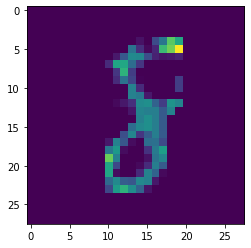

In [10]:
plt.imshow(x_test[6578])
plt.show()

In [11]:
print(np.argmax(predictions[6578]))  # to get the predicted value of index 2

8


# Second Algorithm (CNN)

In [12]:
x_train_Cnn = np.expand_dims(x_train, axis=-1)
x_test_Cnn = np.expand_dims(x_test, axis=-1)
Cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [13]:
Cnn_model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [14]:
Cnn_model.fit(x_train_Cnn,y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1439 - accuracy: 0.9556
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0478 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0328 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0181 - accuracy: 0.9945


In [15]:
Cnn_val_loss , Cnn_val_acc = Cnn_model.evaluate(x_test_Cnn, y_test)
print("CNN Validation Loss:", Cnn_val_loss)
print("CNN Validation Accuracy:", Cnn_val_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0424 - accuracy: 0.9879
CNN Validation Loss: 0.042433395981788635
CNN Validation Accuracy: 0.9879000186920166


In [16]:
Cnn_model.save_weights('CNN-MNIST.h5')

In [17]:
Cnn_model.save('epic_num_reader.model') # to save your parameters

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [18]:
new_model = tf.keras.models.load_model('epic_num_reader.model') # to load the parameters

In [19]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 3s 9ms/step
[[1.2679011e-13 2.2516489e-11 3.6696375e-11 ... 1.0000000e+00
  7.2338047e-12 1.7535150e-08]
 [2.0534224e-04 1.2216398e-06 9.9978620e-01 ... 1.2223250e-06
  1.7900115e-07 3.5297337e-08]
 [8.3382652e-08 9.9998283e-01 5.3986728e-08 ... 1.5008297e-06
  1.3523716e-06 1.8075782e-07]
 ...
 [2.7560614e-12 1.3447378e-08 6.1415845e-10 ... 3.4361097e-08
  9.0787950e-08 4.3060408e-07]
 [6.6555170e-09 1.8836286e-07 6.8872810e-11 ... 3.4909647e-10
  1.3057604e-06 4.3284267e-08]
 [1.0525301e-03 2.0328805e-06 1.3843950e-06 ... 3.3244667e-08
  3.1941192e-06 1.3202005e-06]]


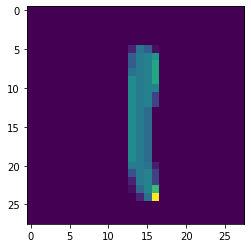

In [20]:
plt.imshow(x_test[652])
plt.show()

In [21]:
print(np.argmax(predictions[652]))  # to get the predicted value of index 652

1


# Comparison Between The Two Algorithms

In [22]:
print("DNN vs CNN Performance Comparison:")
print("DNN Validation Accuracy:", Dnn_val_acc)
print("CNN Validation Accuracy:", Cnn_val_acc)

DNN vs CNN Performance Comparison:
DNN Validation Accuracy: 0.9753000140190125
CNN Validation Accuracy: 0.9879000186920166


# GUI

In [23]:
import tkinter as tk
import cv2
from PIL import ImageTk,Image,ImageDraw

In [25]:
Cnn_model.load_weights('CNN-MNIST.h5')

In [26]:
count = 0
img = Image.new('RGB', (500, 500), (0, 0, 0))
img_draw = ImageDraw.Draw(img)

win = tk.Tk()

canvas = tk.Canvas(win, width=500, height=500, bg='white')
canvas.grid(row=0, column=0, columnspan=4)


In [27]:
def event_function(event):
    
    x=event.x
    y=event.y
    
    x1=x-30
    y1=y-30
    
    x2=x+30
    y2=y+30

    canvas.create_oval((x1,y1,x2,y2),fill='black')
    img_draw.ellipse((x1,y1,x2,y2),fill='white')

In [28]:
def save():
    
    global count
    
    img_array=np.array(img)
    img_array = img_array[:, :, 0]
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = img_array / 255.0
    img_array=img_array.reshape(1,28,28,1)
    
    cv2.imwrite(str(count)+'.jpg',img_array)
    count=count+1


In [30]:
def clear():
    
    global img,img_draw
    
    canvas.delete('all')
    img=Image.new('RGB',(500,500),(0,0,0))
    img_draw=ImageDraw.Draw(img)    
    
    label_status.config(text='PREDICTED DIGIT: NONE')


In [37]:
def predict():
    
    img_array=np.array(img)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY) # to convert to grayscale
    img_array = cv2.resize(img_array, (28, 28))
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array=img_array/255.0
    img_array=img_array.reshape(1,28,28,1)
    result=Cnn_model.predict(img_array)
    label=np.argmax(result,axis=1)
    
    label_status.config(text='PREDICTED DIGIT:'+str(label))
    
count=0
    
win=tk.Tk()
win.title("Digit Recognition")

canvas=tk.Canvas(win,width=500,height=500,bg='white')
canvas.grid(row=0,column=0,columnspan=4)

button_save=tk.Button(win,text='SAVE',bg='green',fg='white',font='Helvetica 20 bold',command=save)
button_save.grid(row=1,column=0)

button_predict=tk.Button(win,text='PREDICT',bg='blue',fg='white',font='Helvetica 20 bold',command=predict)
button_predict.grid(row=1,column=1)

button_clear=tk.Button(win,text='CLEAR',bg='yellow',fg='white',font='Helvetica 20 bold',command=clear)
button_clear.grid(row=1,column=2)

button_exit=tk.Button(win,text='EXIT',bg='red',fg='white',font='Helvetica 20 bold',command=win.destroy)
button_exit.grid(row=1,column=3)

label_status=tk.Label(win,text='PREDICTED DIGIT: NONE',bg='white',font='Helvetica 24 bold')
label_status.grid(row=2,column=0,columnspan=4)

canvas.bind('<B1-Motion>',event_function)
img=Image.new('RGB',(500,500),(0,0,0))
img_draw=ImageDraw.Draw(img)

win.mainloop()

1/1 [==============================] - 0s 28ms/step
